In [169]:
import tess as t
import pandas as pd
import numpy as np
import scipy.spatial as sptl
import matplotlib.pyplot as plt
import math as m
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import random

Function to extrapolate the edges from the face connectivity

In [170]:
def edgy(faces):
    edges = [ [], [] ]
    for facet in faces:
        edges[0].extend(facet[:-1]+[facet[-1]])
        edges[1].extend(facet[1:]+[facet[0]])
    
    edges = np.vstack(edges).T
    edges = np.sort(edges, axis=1)
    edges = edges[:, 0] + 1j*edges[:, 1]  # Convert to imaginary
    edges = np.unique(edges)  # Remove duplicates
    edges = np.vstack((np.real(edges), np.imag(edges))).T  # Back to real
    
    return edges.astype(int)

Random distribution off points with random radii

In [171]:
n_pp = 25
pp = np.random.uniform(low=-2.5, high=2.5, size=(n_pp,3))
rad = []

for x in range(n_pp):
    rad.append(random.uniform(0.1,0.01))

Creation of the L-V tessellation

In [172]:
cells = t.Container(pp, limits=((-2.5, -2.5, -2.5),( 2.5, 2.5, 2.5)),
                    periodic=True, radii=rad)

# plotting the whole tessellation

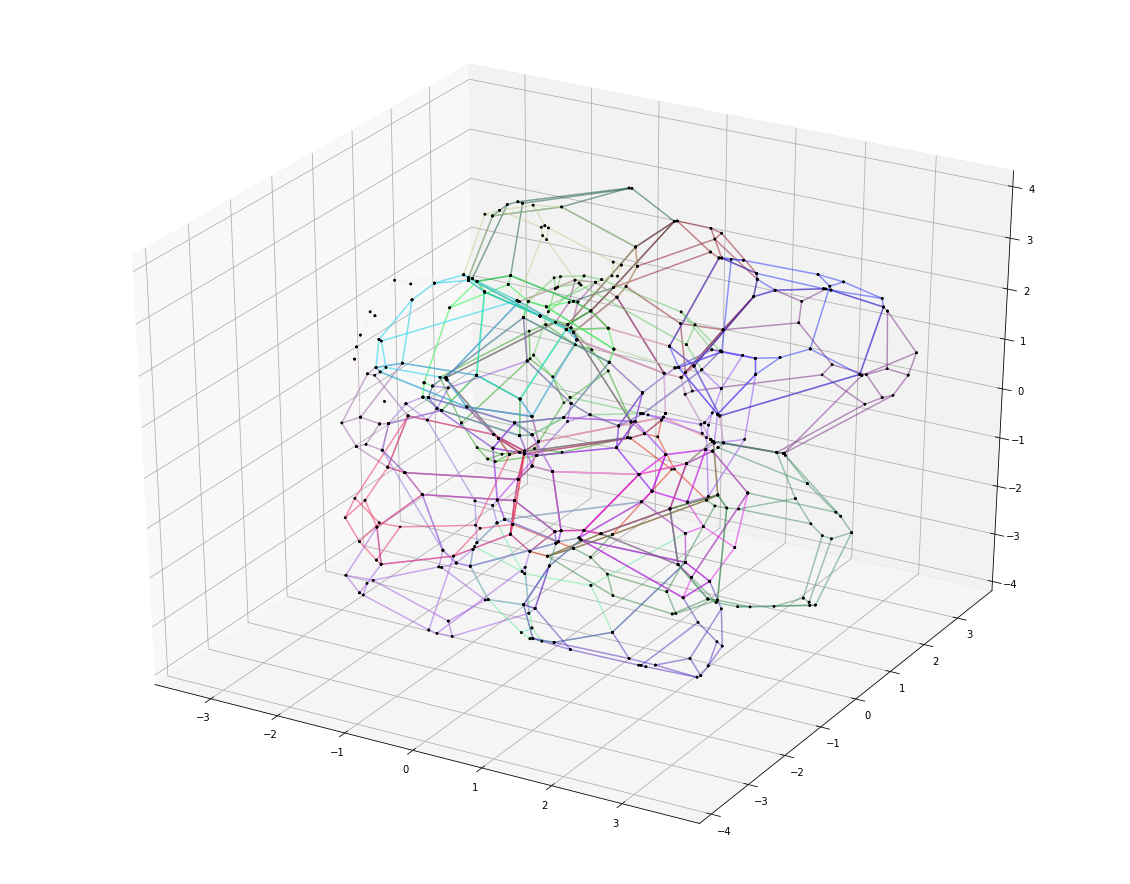

In [173]:
mpl.rcParams['figure.figsize'] = (20,16)
ax = plt.gca(projection="3d")

for i in range(len(cells)):

    ff = cells[i].face_vertices()
    EE_conn = np.array(edgy(ff), dtype=int)
    PP = np.array(cells[i].vertices())
    EE = PP[EE_conn]
    shades = np.random.rand(3,)
    for k in range( len(EE)):
        x,y,z = EE[k][:,0], EE[k][:,1], EE[k][:,2]
        ax.scatter(x,y,z, c='k',s=3)
        ax.plot(x,y,z, color=shades, alpha=0.5)
plt.show()

In [174]:
from Geom import *

In [175]:
import pickle

In [176]:
def uniquify(edges):
    new = [tuple(row) for row in edges.reshape(len(edges), 6)]
    unique = list(dict.fromkeys(new))
    out = np.array(unique).reshape(len(unique),2,3)
    return out

In [177]:
fac = [elem.face_vertices() for elem in cells]
ppp = [np.array(elem.vertices()) for elem in cells]
edgeLinks = [edgy(elem) for elem in fac]
eee = [elem[item] for elem,item in zip(ppp,edgeLinks)]
allEd =   np.around(np.vstack(eee), decimals=5)
edgeTo = [Edge(Point(elem[0]),Point(elem[1])) for elem in allEd]


In [ ]:
hhh =np.array([allEd_un[23],allEd_un[27],allEd_un[28], allEd_un[42],allEd_un[52], allEd_un[57], allEd_un[60],allEd_un[66]])
# uuu = np.array([t[::-1] if t[0,0] < t[1,0] else t for t in hhh])
uuu = np.array([t[::-1] if ((t[0,0] < t[1,0]) or (t[0,0] == t[1,0] and t[0,1] < t[1,1]))  else t for t in hhh])

In [178]:
sort_edge = np.array([t[::-1] if ((t[0,0] < t[1,0]) or (t[0,0] == t[1,0] and t[0,1] < t[1,1]))  else t for t in allEd])
allEd_un = uniquify(sort_edge)
edgeTo_un = [Edge(Point(elem[0]),Point(elem[1])) for elem in allEd_un]

In [179]:
edgeToBlender = open("edgesData.pickle", "wb")
pickle.dump(edgeTo, edgeToBlender)
edgeToBlender.close()

eToB = open("uniqueEdgesData.pickle", "wb")
pickle.dump(edgeTo_un, eToB)
eToB.close()

In [58]:
ct1 = cells[4]
points =np.array(ct1.vertices())
conn = np.array(edgy(ct1.face_vertices()), dtype=int)

In [56]:
c1 = Cell(conn, points)

In [34]:
ct1.face_vertices()

[[1, 2, 11, 4],
 [1, 5, 3, 2],
 [1, 4, 0, 8, 5],
 [2, 3, 7, 6, 10, 11],
 [3, 5, 8, 9, 7],
 [4, 11, 10, 0],
 [6, 9, 8, 0, 10],
 [6, 7, 9]]

In [35]:
for i in range(len(ct1.face_vertices())):
    print('face=', ct1.face_vertices()[i],'has area=',np.around( ct1.face_areas()[i], decimals=5),
          'and normal', list(np.around(ct1.normals()[i], decimals=5)))


face= [1, 2, 11, 4] has area= 3.02193 and normal [0.4105, -0.3457, -0.84379]
face= [1, 5, 3, 2] has area= 3.47685 and normal [0.0, 1.0, 0.0]
face= [1, 4, 0, 8, 5] has area= 5.25933 and normal [0.92164, -0.36659, -0.12725]
face= [2, 3, 7, 6, 10, 11] has area= 9.85887 and normal [-1.0, 0.0, 0.0]
face= [3, 5, 8, 9, 7] has area= 3.25727 and normal [0.67542, 0.51136, 0.53134]
face= [4, 11, 10, 0] has area= 0.12405 and normal [-0.04996, -0.75, -0.65954]
face= [6, 9, 8, 0, 10] has area= 2.7093 and normal [0.58219, -0.76652, 0.27111]
face= [6, 7, 9] has area= 0.8357 and normal [0.0, 0.0, 1.0]


In [36]:
for i in range(len(c1.F)):
    print('face=', c1.F[i].vert[:-1], 'has area=',np.around(c1.F[i].area(),decimals=5), 
          'and normal=', np.around(c1.F[i].normal(), decimals=3),
          'centroid', np.around(c1.F[i].centroid, decimals=3))

face= [0, 4, 1, 5, 8] has area= 5.25933 and normal= [ 0.922 -0.367 -0.127] centroid [-1.547  0.968  0.163]
face= [0, 8, 9, 6, 10] has area= 2.7093 and normal= [ 0.582 -0.767  0.271] centroid [-2.023  0.12   1.39 ]
face= [0, 10, 11, 4] has area= 0.12405 and normal= [-0.05 -0.75 -0.66] centroid [-2.346 -0.508 -0.208]
face= [1, 2, 3, 5] has area= 3.47685 and normal= [ 0.  1. -0.] centroid [-1.76   2.5   -0.111]
face= [1, 4, 11, 2] has area= 3.02193 and normal= [ 0.411 -0.346 -0.844] centroid [-2.068  1.062 -0.815]
face= [2, 3, 7, 6, 10, 11] has area= 9.85887 and normal= [ 1.  0. -0.] centroid [-2.5    1.032  0.83 ]
face= [3, 5, 8, 9, 7] has area= 3.25727 and normal= [-0.675 -0.511 -0.531] centroid [-1.773  1.749  1.833]
face= [6, 7, 9] has area= 0.8357 and normal= [ 0.  0. -1.] centroid [-2.201  0.999  2.5  ]


In [37]:
print('ct1 vol=', ct1.volume())
print('c1 vol=', c1.volume())

ct1 vol= 8.065977900485176
c1 vol= 17.060988978213278


In [38]:
n_edges = []
for i in range(len(cells)):
    n_edges.append(cells[i].number_of_edges())
ave_E = sum(n_edges)/len(n_edges)

In [39]:
n_faces = []
for i in range(len(cells)):
    n_faces.append(cells[i].number_of_faces())
ave_F = sum(n_faces)/len(n_faces)

In [40]:
print('tot_edges',sum(n_edges))
print('tot_faces', sum(n_faces))

tot_edges 216.0
tot_faces 92.0


In [41]:
all_EE = []
for i in range(len(cells)):

    ff = cells[i].face_vertices()
    EE_conn = np.array(edgy(ff), dtype=int)
    PP = np.array(cells[i].vertices())
    EE = PP[EE_conn]
    all_EE.extend(EE)


In [42]:
len(all_EE)

216

In [43]:
centroids = []
radio = []

for j in range(len(cells)):
    
    centroids.append(np.array(cells[j].centroid()))
    radio.append(np.array(cells[j].radius))
    

In [44]:
aa = np.array([[[1 ,2 ,3],[0 ,1 ,0]],[[4 ,5 ,6],[0 ,1 ,7]], [[4 ,8 ,6],[7 ,1 ,0]], [[4 ,4 ,6],[1 ,1 ,7]], [[1 ,6 ,3],[0 ,1 ,8]],[[1.0001 ,2 ,3],[0 ,1 ,0]]])

In [45]:
u, un_ind = np.unique(aa, axis=0, return_index=True)

In [46]:
u

array([[[1.    , 2.    , 3.    ],
        [0.    , 1.    , 0.    ]],

       [[1.    , 6.    , 3.    ],
        [0.    , 1.    , 8.    ]],

       [[1.0001, 2.    , 3.    ],
        [0.    , 1.    , 0.    ]],

       [[4.    , 4.    , 6.    ],
        [1.    , 1.    , 7.    ]],

       [[4.    , 5.    , 6.    ],
        [0.    , 1.    , 7.    ]],

       [[4.    , 8.    , 6.    ],
        [7.    , 1.    , 0.    ]]])

In [47]:
edg, ind_edg = np.unique(all_EE, axis=0, return_index=True)